#### Data Science - Coursework 2 (50%)
# What caused this gravitational wave signal?
## Deadline Friday week 11, 2pm.

#### Instructions

This coursework assesses learning outcomes from **all Chapters** of the course, but in particular **Chapters 6, 7, 8 and 9**. It is worth 50% of the module. Please ensure you have read the [Chapter 8 Jupyter Notebook](https://github.com/haleygomez/Data-Science-2024/blob/master/blended_exercises/Chapter8/Chapter8.ipynb) before starting this coursework.

**These assessments are equivalent to an exam**:
- Submit your work via Turn-It-In on Learning Central. Note that you will need to upload your final notebook exported as a PDF file. **Don't forget to click `run all` before you export it**. You can constantly update this document until the deadline.
- The breakdown of the assessment criteria is provided in Learning Central under Assessment.
- Don't worry about how your code looks - marks are not given for pretty code, but rather for the approach used in solving the problem, your reasoning, explanation and answer.
- It is estimated that the workload required for this CA is approximately 30-35 hours.

<div class="alert-info">
Please also take note of the University’s policy on plagiarism, which is outlined in your student handbook.
 </div>

Plagiarism is the act of passing off the words or ideas of others as if your own. Advice on avoiding plagiarism is given in the UG Student Handbook. There is also considerable help and advice on Learning Central and the University web site. Students need to be especially careful of plagiarism in computing tasks and you are advised not to share code through electronic means. Students working together during their weekly exercises and the coursework is great (and indeed encouraged) but need to ensure that they are not using each other's code or text.

This coursework will be submitted via Learning Central's Turnitin which automatically checks for plagiarism.

#### Tips


- Explain all your reasoning for each step. A *significant fraction* of the marks are given for explanations and discussion, as they evidence understanding of the analysis.  
- Some of these steps will take a while to run and compile. It's a good idea to add in print statements to your code throughout eg `print('this step is done')` to make sure that your bit of code has finished.
- Add the import packages statements at the top of your Jupyter notebook. We will use the `pandas` package to read in the data, with eg `dataIn=pd.read_csv('filename.csv')`.
- You may need to do some additional research into this subject. You will find it useful to look at the following publication from the LIGO consortium. https://arxiv.org/pdf/1608.01940.pdf

***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Part A - Some background [15 marks]

**Answer:**

How do astronomers know that the gravitational waves from the GW150914 event were due to two black holes merging?

Describe the different parts of the waveform produced due to gravitational waves from a merging black hole event.

The file gravitationalwaveevents.csv contains the properties of previously observed gravitational waves.
Plot the total mass (given in solar masses, 1M⊙ = 1.99×10^30 kg) of the merging sources against their distance (given in units of Mpc, 1 pc = 3 × 10^16m).

Loading the data from GravitationalWaveEvents.csv and displaying headers and first few entries to ensure correct loading and inspect data.

In [2]:
#Load and show data
GravWavDat=pd.read_csv('/content/gravitationalwaveevents.csv')
print(GravWavDat.head())

       DL  DL_err  Mtot  Mtot_err  Mchirp  Mchirp_err detType
0   430.0   170.0  63.1       3.0    28.6        -1.5      GW
1  1060.0   480.0  35.7       3.8    15.2        -1.1      GW
2   440.0   190.0  20.5       1.5     8.9        -0.3      GW
3   960.0   410.0  49.1       3.9    21.5        -1.7      GW
4   320.0   110.0  17.8       0.7     7.9        -0.2      GW


Having seen that luminosity distance and total mass both have error values I will use matplotlib.plot.errorbar to show all the informaton we have.

Text(0.5, 1.0, 'Gravitational Wave Data: Luminosity Distance vs Total Mass')

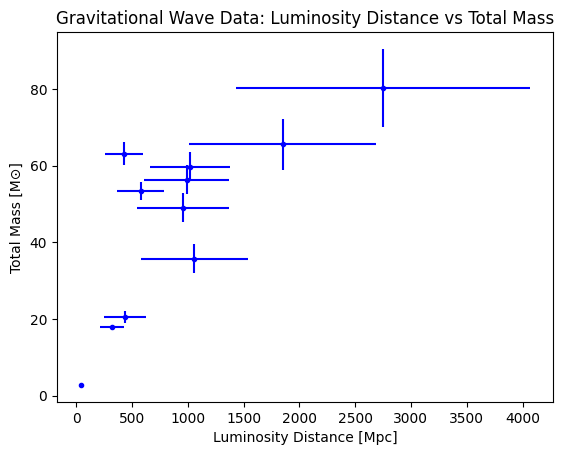

In [3]:
#plot Mass vs Distance, with errors
plt.errorbar(GravWavDat['DL'],GravWavDat['Mtot'],GravWavDat['Mtot_err'],GravWavDat['DL_err'],'b.')
plt.xlabel('Luminosity Distance [Mpc]')
plt.ylabel('Total Mass [M⊙]')
plt.title('Gravitational Wave Data: Luminosity Distance vs Total Mass')

I have noticed a potential trend in the data, I belive there to be a positive correlation between mass and distance.
But I cannot just go from visual aproximations. I have been taught tools to test for this.

In [4]:
from scipy.stats import spearmanr

eventsR, eventsP = spearmanr(GravWavDat['Mtot'], GravWavDat['DL'])

print(f"Spearman's correlation coefficient: {eventsR:.3f}")
print(f"P-value: {eventsP:.3f}")

Spearman's correlation coefficient: 0.709
P-value: 0.015


The spearmans correlation coefficent of 0.71 is interpreted as a strong positive correlation between mass and distance. With a P-Value of 0.015, which falls comfortably under the accepted threshold of 0.05, I am confident to say this.

The corelation is easily explained by thinking about the nature of the detectors, the rarity of these events and the nature of 3d space around us.

Gravitational wave amplitude decreases with distance as 1/r, which limits our ability to detect low-mass systems at large distances. Similarly, the apparent lack of high-mass binaries at close distances reflects their intrinsic rarity, with detections typically occurring at larger distances due to the increased observational volume. The chances of detecting such systems grow with r^3, as the observable volume expands.

***

## Part B - The data [15 marks]

**Answer:**

I will read the datafile of the waveform Observedwaveform.csv and plot to visualy determain the minimum and maximum time of the event. The approximate location of the maxima. And the expected noise in the post ring down "silence"


Strain mean 0.00


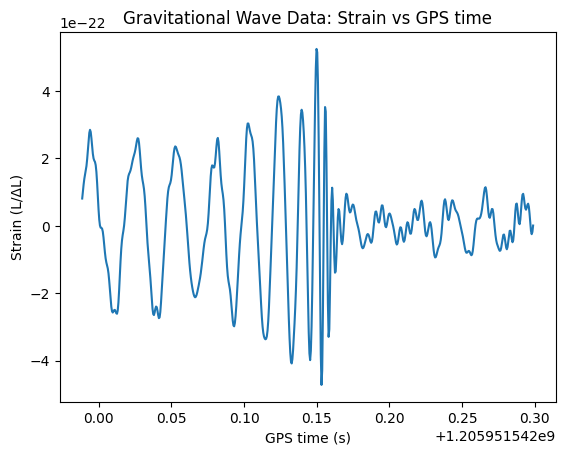

In [5]:
'''Read in the data table for GW event'''

ObsGravWav=pd.read_csv('/content/Observedwaveform.csv')
# print(ObsGravWav.head())


'''plot to inspect current state of data'''

plt.plot(ObsGravWav['time (s)'],ObsGravWav['strain'])
plt.xlabel('GPS time (s)')
plt.ylabel('Strain (L/ΔL)')
plt.title('Gravitational Wave Data: Strain vs GPS time')

print(f"Strain mean {ObsGravWav['strain'].mean():.2f}")


A strain mean of 0 shows no unexpected bias in the data.

We are given the GPStime of the merger. To match with the model data, ours will need to be shifted so that the merger occurs at time = 0 secs.

This is achived by subtracting the GPS time from every element in the 'time' array. The output is then stored in a new array 'merge time'.

Text(0.5, 1.0, 'Gravitational Wave Data: Strain vs Merger time')

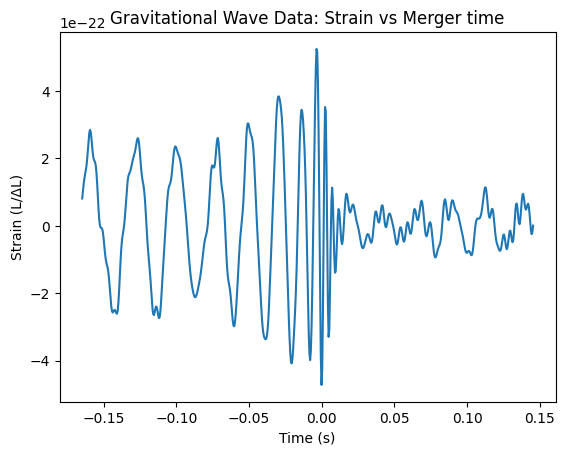

In [6]:
'''Make variable for merger time and take this away from merge data to have merge at t=0, make new field in data for this time'''
GPSMergeTime = 1205951542.153363

ObsGravWav['mergeTime'] = ObsGravWav['time (s)'] - GPSMergeTime

plt.plot(ObsGravWav['mergeTime'],ObsGravWav['strain'])
plt.xlabel('Time (s)')
plt.ylabel('Strain (L/ΔL)')
plt.title('Gravitational Wave Data: Strain vs Merger time')

This plot handily shows that the wave form has not been changed in the transformation at all, just the time coordinate

We need to estimate the average noise and its standard deviation in our data.

We start by trying to isolate the merge free data after the event, i.e time >0. If there is no active merger then there should only be noise found in the data.

Text(0.5, 1.0, 'Gravitational Wave Data: RingDown And Noise')

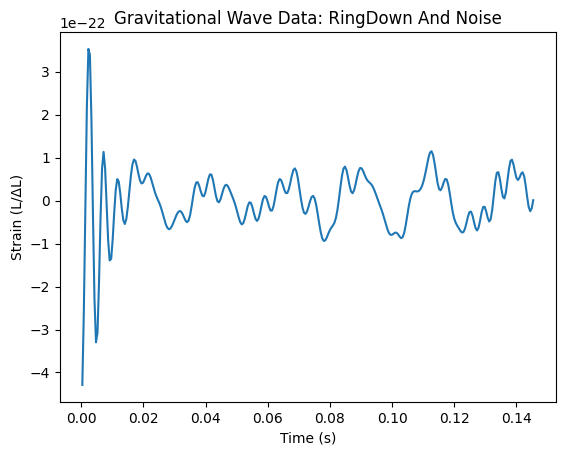

In [7]:
'''To estimate noise, truncate data to only have t>0
Merger is now finsihed we should only have noise in data'''
#chat gpt help to select the entires corrosponding to t>0 from the pandas data frame

positive_time_values = ObsGravWav.loc[ObsGravWav['mergeTime'] > 0, ['mergeTime', 'strain']]

# print(positive_time_values)

plt.plot(positive_time_values['mergeTime'],positive_time_values['strain'])
plt.xlabel('Time (s)')
plt.ylabel('Strain (L/ΔL)')
plt.title('Gravitational Wave Data: RingDown And Noise')

This approach of taking the data with merge time >0 visably leaves some of the merger event ring down in the data. The "Smooth" decaying sine wave before t=0.015

Text(0.5, 1.0, 'Gravitational Wave Data: Noise Profile')

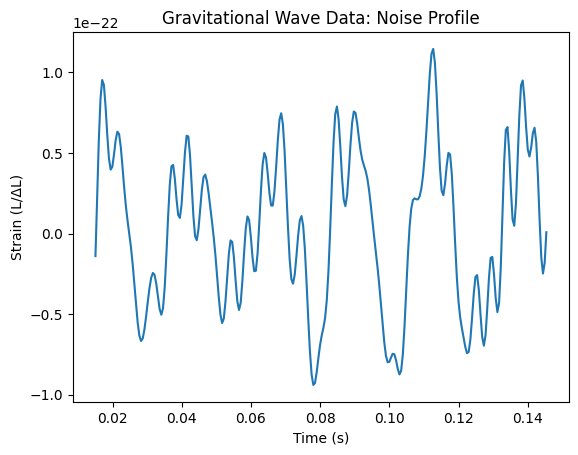

In [8]:
#new lower bound on time

positive_time_values_2 = ObsGravWav.loc[ObsGravWav['mergeTime'] > 0.015, ['mergeTime', 'strain']]

plt.plot(positive_time_values_2['mergeTime'],positive_time_values_2['strain'])
plt.xlabel('Time (s)')
plt.ylabel('Strain (L/ΔL)')
plt.title('Gravitational Wave Data: Noise Profile')

This data look much more uniformly 'noisy' without an obvious behaviour.
With data validity considered we can take the mean and standard deviation of the signal free noise region.

In [9]:
#using pandas built in functions we can get the mean and standard deviation
noiseMean = positive_time_values_2['strain'].mean()
noiseStd = positive_time_values_2['strain'].std()

print(f"The mean of our noise is {noiseMean:.3e} with StdDev {noiseStd:.3e}")

The mean of our noise is 3.696e-24 with StdDev 4.858e-23


***

## Part C - Interpolate reference model to match the observed data time sampling [15 marks]

Here I load the 2 mock data, the first few lines are printed to inform me as to what names are used as coloum headers and that there are no obvious data errors.

Then plot the data to inspect that we have identifiable merger and ringdown and that the merger takes place at t=0.

And finally store and print the smallest value in the time arrays for both sets of data.

         strain  time (s)
0  1.545156e-19 -0.164658
1  1.171263e-19 -0.164170
2  1.082966e-19 -0.163681
3  1.389174e-19 -0.163193
4  2.190045e-19 -0.162704
The minimum time in this data set is -0.16466


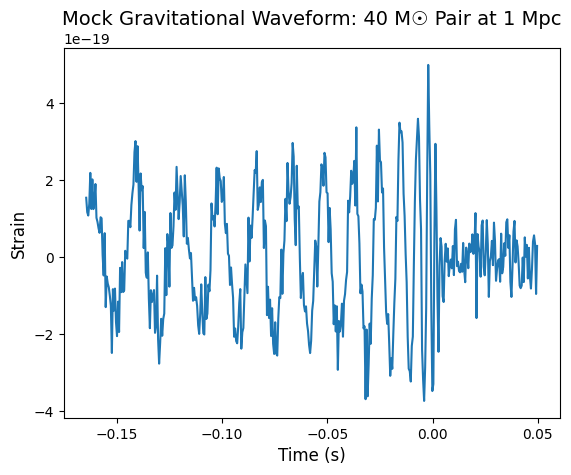

In [10]:
mock40M1D=pd.read_csv('/content/mockdata_waveform_40Msun_1Mpc.csv')
print(mock40M1D.head())

plt.plot(mock40M1D['time (s)'],mock40M1D['strain'])
plt.title('Mock Gravitational Waveform: 40 M☉ Pair at 1 Mpc', fontsize=14)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Strain', fontsize=12)

mock40M1Dtmin = mock40M1D['time (s)'].min()
print(f"The minimum time in this data set is {mock40M1Dtmin:.5f}") #5 digits chosen as we do not see variability before the 4th

         strain  time (s)
0 -1.934524e-20 -0.164658
1 -4.436423e-20 -0.164170
2 -4.776572e-20 -0.163681
3 -4.637995e-20 -0.163193
4 -6.529435e-20 -0.162704


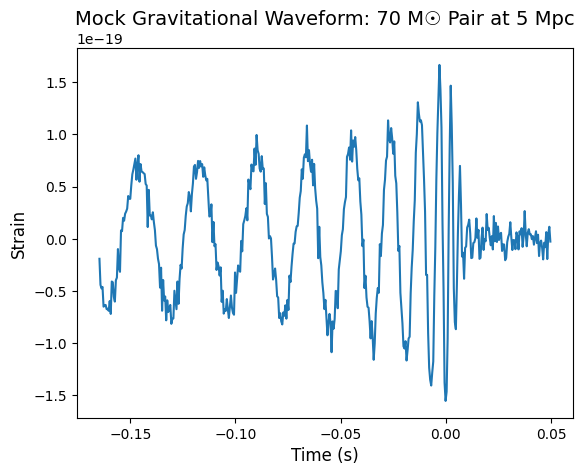

The minimum time in this data set is -0.16466


In [11]:
mock70M5D = pd.read_csv('/content/mockdata_waveform_70Msun_5Mpc.csv')
print(mock70M5D.head())

plt.plot(mock70M5D['time (s)'], mock70M5D['strain'])
plt.title('Mock Gravitational Waveform: 70 M☉ Pair at 5 Mpc', fontsize=14)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Strain', fontsize=12)
plt.show()

mock70M5Dtmin = mock70M5D['time (s)'].min()
print(f"The minimum time in this data set is {mock70M5Dtmin:.5f}")

Load the referance waveform and do the customary check of first few rows. Both to get header names and also a quick inspection of data.

In [12]:
''' Pandas builtin read_csv is exactly what I need here'''
refWave = pd.read_csv('/content/reference_waveform_40Msun_1Mpc.csv')
print(refWave.head())

         strain   time (s)
0 -6.162294e-20 -11.946102
1 -6.140841e-20 -11.945614
2 -6.113607e-20 -11.945126
3 -6.080617e-20 -11.944637
4 -6.041902e-20 -11.944149


The minimum time in our new data is -0.16436


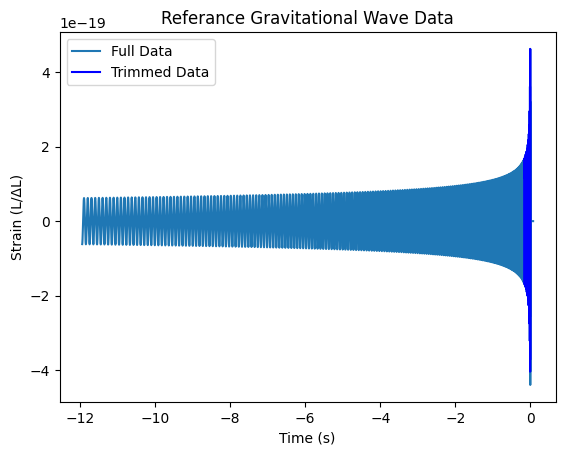

In [13]:
'''
Take refereance_waveform and chop off times before tmin and after t0
check smallest t in refereance_waveform

plot the data to see what it looks like
'''

trimmedRefWave = refWave.loc[(refWave['time (s)'] >= mock40M1Dtmin) & (refWave['time (s)'] < 0), ['time (s)', 'strain']]

print(f"The minimum time in our new data is {trimmedRefWave['time (s)'].min():.5f}")

plt.plot(refWave['time (s)'],refWave['strain'],label="Full Data")
plt.plot(trimmedRefWave['time (s)'], trimmedRefWave['strain'],"b",label="Trimmed Data")
plt.xlabel('Time (s)')
plt.ylabel('Strain (L/ΔL)')
plt.title('Referance Gravitational Wave Data')
plt.legend()

This highlights the need for the truncation.. I personally did not realise the size differance in the data sets until plotting them like this... But its not the most helpful to see the trimmed data so I will replot

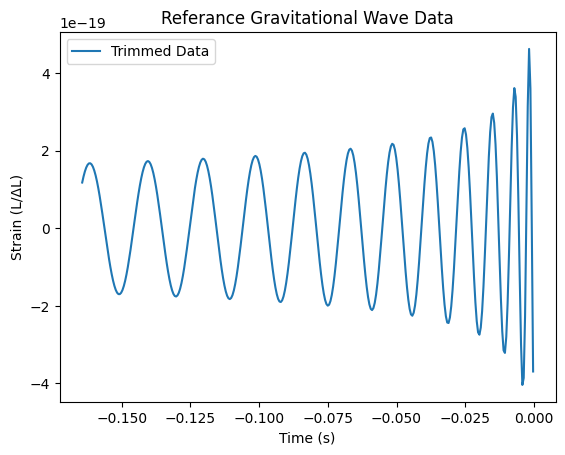

In [14]:
plt.plot(trimmedRefWave['time (s)'], trimmedRefWave['strain'],label="Trimmed Data")
plt.xlabel('Time (s)')
plt.ylabel('Strain (L/ΔL)')
plt.title('Referance Gravitational Wave Data')
plt.legend()

The data look good. The values are in sensiable ranges and the data takes on a recognisable wave form.

Lets compare it to the mock data given earlier

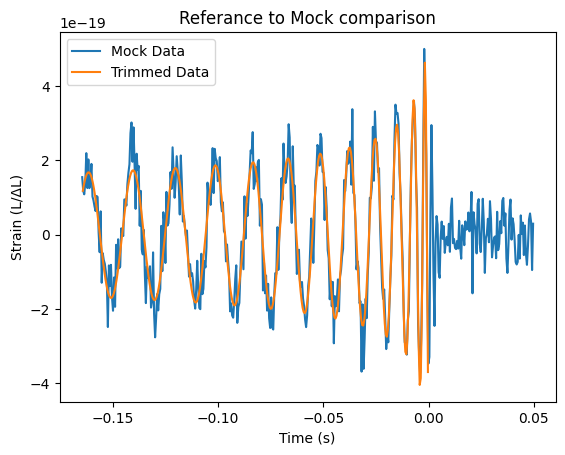

In [15]:
plt.plot(mock40M1D['time (s)'],mock40M1D['strain'],label="Mock Data")
plt.plot(trimmedRefWave['time (s)'], trimmedRefWave['strain'],label="Trimmed Data")
plt.xlabel('Time (s)')
plt.ylabel('Strain (L/ΔL)')
plt.title('Referance to Mock comparison')
plt.legend()

A great fit, but some precision is missing around the peaks. This is due to our differing timesteps in the data so we can interpolate the results with the following code

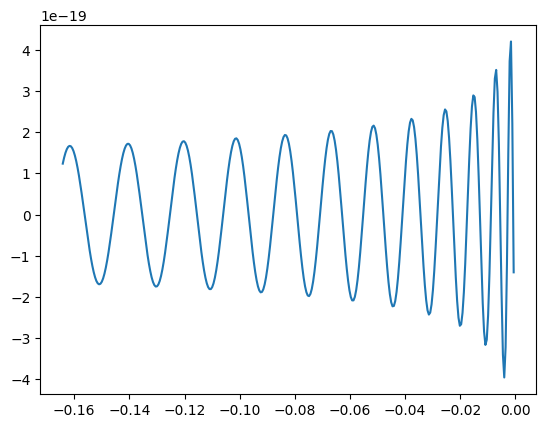

In [16]:
'''
Interpolation code from Project statement
'''
from scipy.interpolate import interp1d
# get interpolation object using a reference waveform with ref_x (time) and ref_y (strain).
interp_fn = interp1d(trimmedRefWave['time (s)'],trimmedRefWave['strain'],bounds_error=False)
# now interpolate the data waveform
interp_strain = interp_fn(mock40M1D['time (s)'])
# plot
plt.plot(mock40M1D['time (s)'],interp_strain)


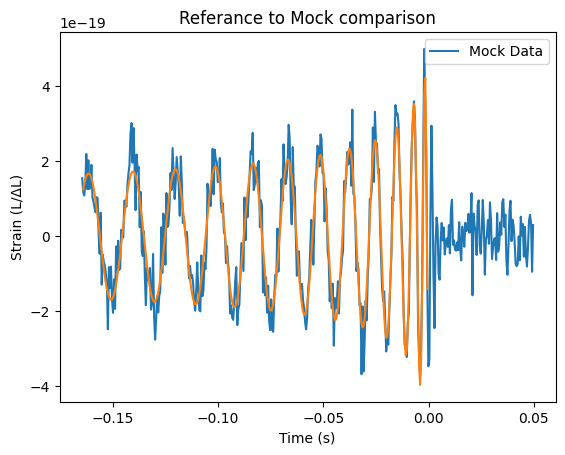

In [17]:
plt.plot(mock40M1D['time (s)'],mock40M1D['strain'],label="Mock Data")
plt.plot(mock40M1D['time (s)'],interp_strain)
plt.xlabel('Time (s)')
plt.ylabel('Strain (L/ΔL)')
plt.title('Referance to Mock comparison')
plt.legend()

Your answer here

***

## Part D - Using model waveforms to estimate the total mass and distance to the system "a by-eye estimate") [24 marks]

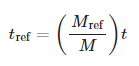

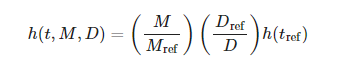

**Answer**

In [18]:
def waveScaling(M,D,times):
  '''using the 40M and 1Mpc ReferanceWave, scale by given Mass and Distance
  return scaledRefWave['time'] scaledRefWave['strain']'''
  #Prepare the data
  refWave = pd.read_csv('/content/reference_waveform_40Msun_1Mpc.csv')
  scaledRefWave = refWave.copy() #This extra line was auto suggested to me and I thought it was a good idea

  #Sacle with maths
  timeScale = M/40
  strainScale = (M/40) * (1/D)
  scaledRefWave['time (s)'] = refWave['time (s)'] * timeScale
  scaledRefWave['strain'] = refWave['strain'] * strainScale

  #Interpolate to match needed timestamps
  interp_fn = interp1d(scaledRefWave['time (s)'],scaledRefWave['strain'],bounds_error=False)
  interp_strain = interp_fn(times)

  return times, interp_strain


In [19]:
'''test function with the 70M and 5Mpc Values
in pandas for consistancy'''
time70M5D, strain70M5D = waveScaling(70,5,mock70M5D['time (s)'])
scaled70M5D = pd.DataFrame({'time': time70M5D, 'strain': strain70M5D})
print(scaled70M5D.head())

       time        strain
0 -0.164658 -5.300246e-20
1 -0.164170 -5.651048e-20
2 -0.163681 -5.979221e-20
3 -0.163193 -6.220414e-20
4 -0.162704 -6.423488e-20


Text(0, 0.5, 'Strain (L/ΔL)')

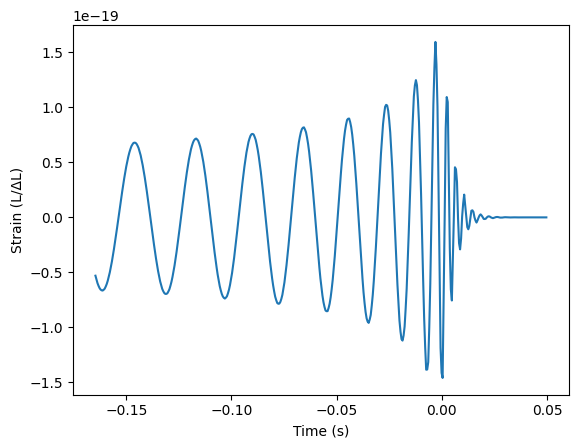

In [20]:
plt.plot(scaled70M5D['time'],scaled70M5D['strain'])
plt.xlabel('Time (s)')
plt.ylabel('Strain (L/ΔL)')


Previously we learned that the 70 Solar mass, 5 Mpc distant, merger data ran for the same period as the 40 Solar mass, 1 Mpc distant one.
Because of this reason I shall perform the same trim opperation

Text(0, 0.5, 'Strain (L/ΔL)')

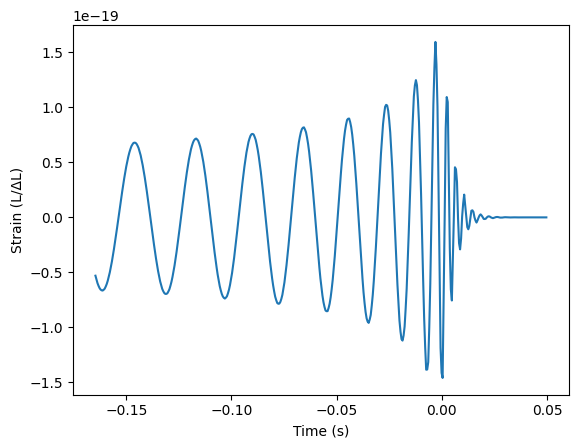

In [21]:
trimmed70M5D = scaled70M5D.loc[(scaled70M5D['time'] >= mock70M5Dtmin), ['time', 'strain']]

plt.plot(trimmed70M5D['time'], trimmed70M5D['strain'])
plt.xlabel('Time (s)')
plt.ylabel('Strain (L/ΔL)')

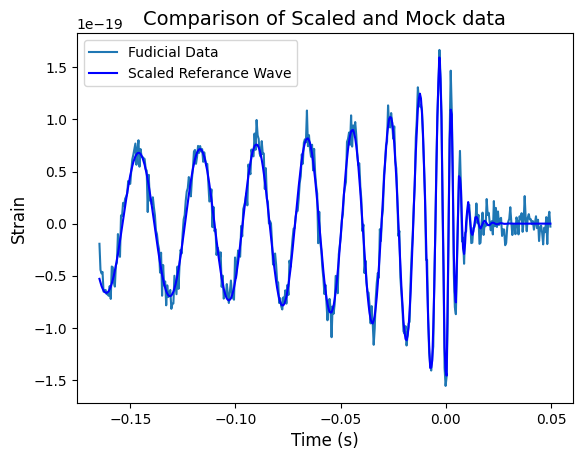

In [22]:
plt.plot(mock70M5D['time (s)'], mock70M5D['strain'], label ="Fudicial Data")
plt.plot(trimmed70M5D['time'], trimmed70M5D['strain'],"b",label ="Scaled Referance Wave")
plt.title('Comparison of Scaled and Mock data', fontsize=14)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Strain', fontsize=12)
plt.legend()
plt.show()

Maybe some tests for goodness of fit.. even though its very good by eye.

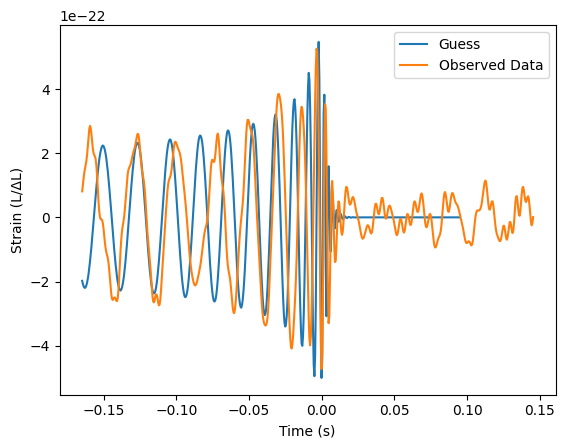

In [49]:
time, strain = waveScaling(50,1000,ObsGravWav['mergeTime'])


plt.plot(time,strain,label="Guess")
plt.plot(ObsGravWav['mergeTime'],ObsGravWav['strain'], label ="Observed Data")
plt.xlabel('Time (s)')
plt.ylabel('Strain (L/ΔL)')
plt.legend()
plt.show()

***

## Part E - Estimating the total mass using MCMC [75 marks]

**Answer:**

Have M and D
Pump into function
Likelyhood Function for fit test?

Your answer here

***

## Part F - Putting it all together [36 marks]

**Answer:**

Your answer here

***

## Evidence of Understanding, Presentation and Interpretation [20 marks]

An additional 20 marks will be awarded for evidence of understanding and knowledge via (for example) explanations, plots, comments on your results and well formatted and well explained results. Marks are also available for additional investigations carried out on your analysis above. These marks are available for those data analysis reports that show evidence of work that is *very high quality* or *outstanding* as per the decile descriptions in the Assessment Criteria for modules. <div align="right">**[20 marks]**</div>